## 3. Análise Exploratória dos Dados (EDA) Tratados  
📒 `2.1-rc-eda-cleaned.ipynb`

**Objetivo:** Explorar os dados tratados por meio de estatísticas descritivas e visualizações gráficas para identificar padrões, tendências e possíveis relações entre variáveis.

📊 **Atividades:**
- Relação entre Variáveis Númericas (scatterplots, heatmap)
- Relação entre Variáveis Categóricas e o Alvo (`price`)
- Insights Relevantes
- Next Steps


In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import sys
from _utils import classificar_correlacao
from scipy.stats import normaltest, pearsonr


sys.path.append("../src")  # adiciona o caminho da pasta src

# Setup para mostrar todas as colunas do dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Desabilita mensagens de FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [232]:
file_path = "../data/processed/car_price_cleaned.csv"
df = pd.read_csv(file_path)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,risk_classification,price-binned,avg-fuel-consumption-kmpl
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,high,medium,10.2
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,high,medium,10.2
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,moderate,medium,9.6
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,high,medium,11.5
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,high,medium,8.5


#### Variável Alvo `price`

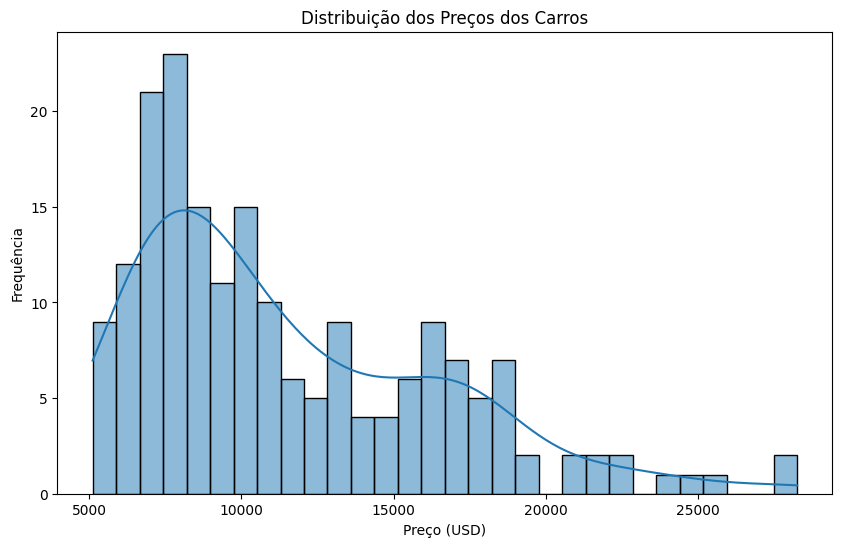

Moda: 10295
Mediana: 9988.0
Media: 11477.874345549739
Distribuição Assimetrica á Direita: moda < media < mediana 


In [233]:
# Análise da distribuição da variável target (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribuição dos Preços dos Carros')
plt.xlabel('Preço (USD)')
plt.ylabel('Frequência')
plt.show()

print("Moda:", df['price'].mode()[0])
print("Mediana:", df['price'].median())
print("Media:", df['price'].mean())
print("Distribuição Assimetrica á Direita: moda < media < mediana ")

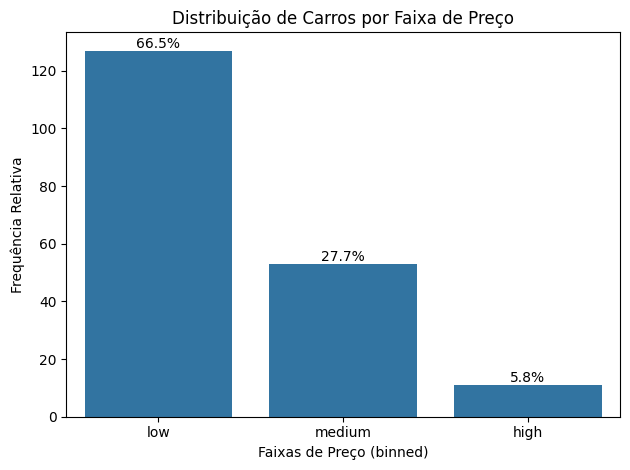

In [234]:
# Contagem absoluta e percentual
price_counts = df['price-binned'].value_counts(normalize=False)
price_percents = df['price-binned'].value_counts(normalize=True) * 100

# Cria o gráfico
ax = sns.barplot(x=price_counts.index, y=price_counts.values)

# Adiciona os labels percentuais nas barras
for i, (count, percent) in enumerate(zip(price_counts.values, price_percents.values)):
    ax.text(i, count + 1, f'{percent:.1f}%', ha='center')

# Rótulos e layout
ax.set_xlabel('Faixas de Preço (binned)')
ax.set_ylabel('Frequência Relativa')
ax.set_title('Distribuição de Carros por Faixa de Preço')

plt.tight_layout()
# Desejo contabilizar o value_counts do `price-binned`

C:\Users\reyna\AppData\Local\Temp\ipykernel_34680\429405639.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


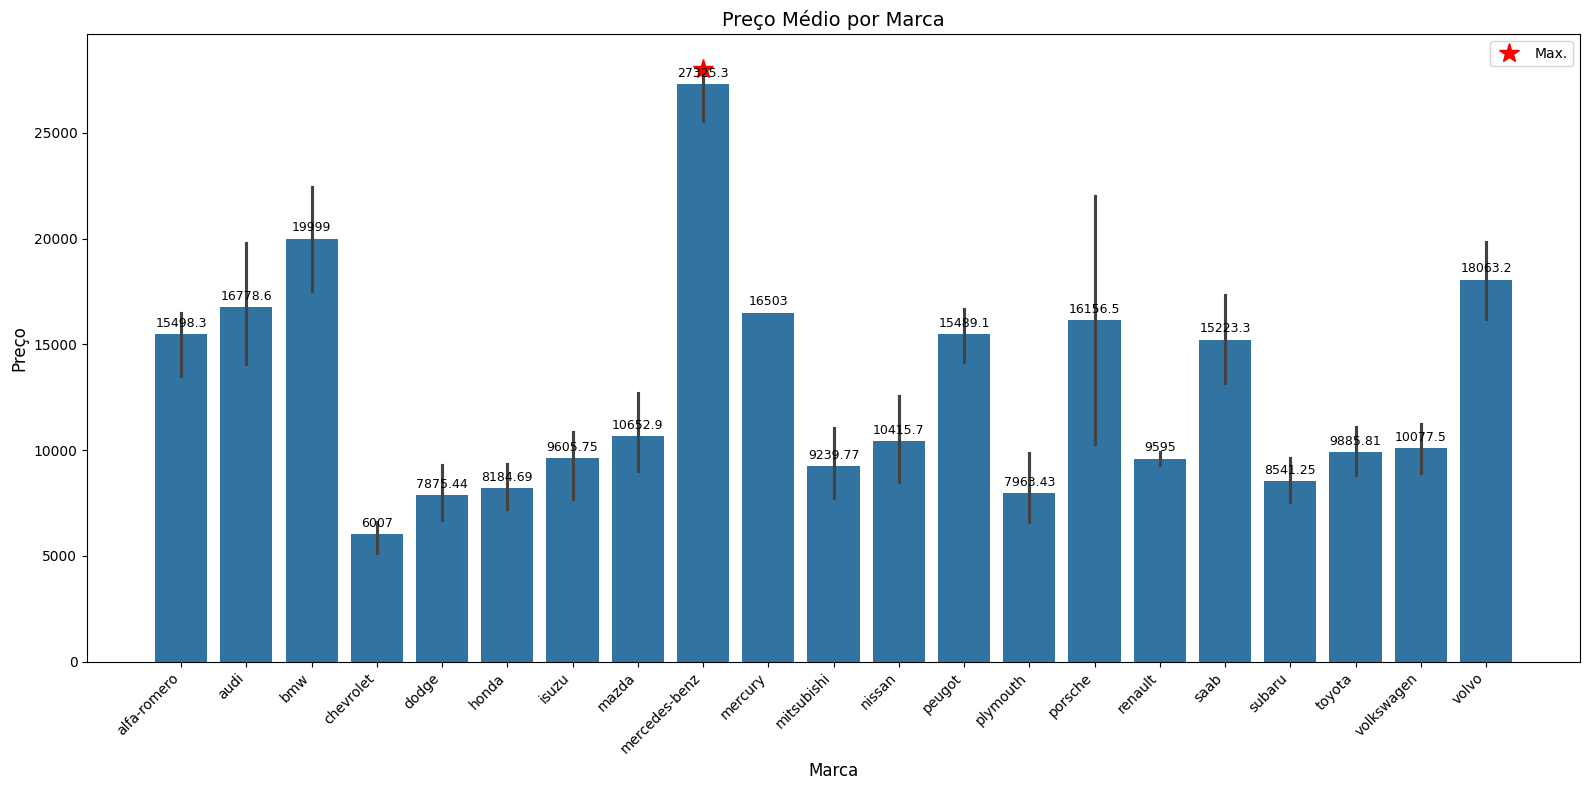

In [235]:
fig, ax = plt.subplots(figsize=(16, 8)) 

sns.barplot(data=df, x='make', y='price', estimator='mean', ax=ax, errorbar='ci')
ax.bar_label(ax.containers[0], fontsize=9, padding=3)
ax.plot('mercedes-benz', 28000, "*", markersize=10, color="r")

# Ajuste para melhorar a leitura dos rótulos no eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Títulos
ax.set_title('Preço Médio por Marca', fontsize=14)
ax.set_xlabel('Marca', fontsize=12)
ax.set_ylabel('Preço', fontsize=12)

# Destaca um ponto específico no gráfico
ax.plot(
    df['make'].unique().tolist().index('mercedes-benz'), 28000,
    "*", markersize=15, color="red", label='Max.'
)

ax.legend()
plt.tight_layout()
plt.savefig('../reports/figures/eda_barplot_price_per_make')

In [236]:
# Listar Veículos classificados como Preço Alto
df_high_price_class = df[df['price-binned'] == 'high']
df_high_price_class

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,risk_classification,price-binned,avg-fuel-consumption-kmpl
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875,moderate,high,7.9
12,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970,moderate,high,10.4
13,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2765,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105,moderate,high,10.4
14,1,115,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565,moderate,high,9.6
61,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,25552,moderate,high,10.0
62,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28248,moderate,high,10.0
63,0,93,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28176,moderate,high,10.0
114,3,186,porsche,gas,std,two,hatchback,rwd,front,94.5,168.9,68.3,50.2,2778,ohc,four,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018,high,high,9.8
188,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,moderate,high,8.7
189,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470,moderate,high,11.3


#### Variáveis Numéricas

**Insights esperados**:
- Quais são as caracteristicas númericas que existe correlação significativa com o alvo `price`? Qual a força dessa correlação? Qual a relação linear?
- Estas caracteristicas estão relacionadas á alguma caracteristica do perfil do mercado avaliado? Se Sim, quais?

In [237]:
# Deletar as colunas de `city-mpg` e `highway-mpg`,  em virtude da variável derivada que foi criada de consumo médio `avg-fuel-consumption`
# Deletar `symboling` variável categórica classificada por 'risk-classification'  
df.drop(['city-mpg', 'highway-mpg', 'symboling'], axis=1, inplace=True)

# Seleciona as variáveis numéricas
features_numeric = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

In [238]:
# Estatistica Descritiva
df.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,avg-fuel-consumption-kmpl
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,120.827225,98.276963,172.826702,65.670157,53.738220,2484.670157,118.858639,3.306492,3.251257,10.182827,98.282723,5128.795812,11477.874346,12.212042
std,32.782320,5.267057,11.347755,1.902242,2.430693,449.312412,27.473929,0.264992,0.303469,4.005299,33.147099,472.572039,4929.765412,2.682342
min,65.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,5118.000000,7.900000
25%,96.500000,94.500000,166.300000,64.000000,52.000000,2128.000000,97.000000,3.130000,3.115000,8.700000,70.000000,4800.000000,7713.500000,10.000000
50%,115.000000,96.500000,172.600000,65.400000,54.100000,2395.000000,110.000000,3.270000,3.290000,9.000000,94.000000,5200.000000,9988.000000,11.900000
75%,141.000000,100.400000,178.300000,66.500000,55.500000,2828.500000,136.000000,3.540000,3.410000,9.400000,114.000000,5500.000000,14954.500000,14.350000
max,256.000000,114.200000,198.900000,72.300000,59.800000,3750.000000,203.000000,3.940000,3.900000,23.000000,288.000000,6600.000000,28248.000000,21.900000


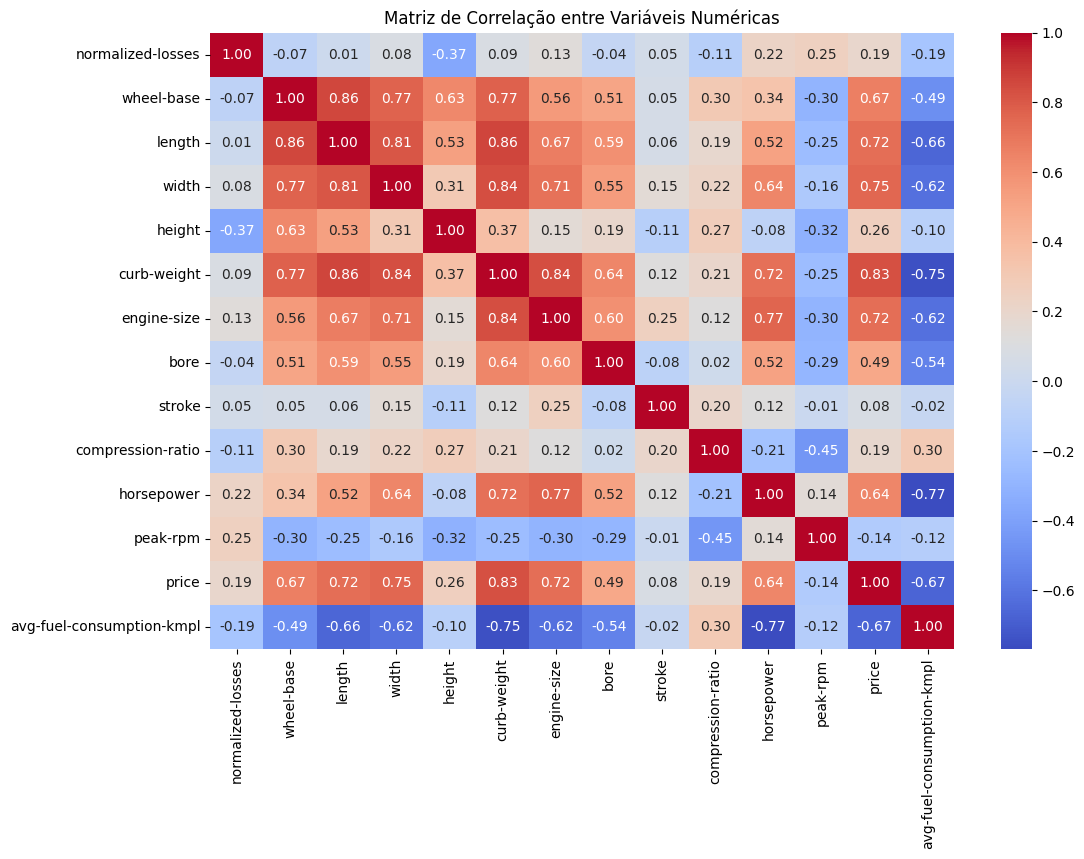

In [239]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df[features_numeric].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.savefig('../reports/figures/eda_heatmap_correlation')



Selecionar as variáveis preditoras que possuem correlação forte ou muito forte com a variável alvo `price`. Aqui o objetivo é verificar se existe correlação e qual a a sua força e se a relação é linear positiva ou negativa.

**NOTA:** Considerar o nível de confiança alpha=0.05 (para um intervalo de 95% de confiança)

- i) **p-value(p):** verifica se existe ou não correlação dentro de um intervalo de confiança de 95%
    - P-value >= 0.05    Ho = ***Falha em rejeitar H₀ - não há correlação significativa***
    - P-value <  0.05    Ha = ***Rejeita H₀ - há diferença ou correlação significativa***
- ii) **pearson_correlation(r):** medir a força da correlação, sendo que (+) a correlação é positiva, (-) a correlação é negativa.

| Valor de r (+ ou -) | Interpretação           |
|---------------------|-------------------------|
| 0.00 a 0.19         | correlação muito fraca  |
| 0.20 a 0.39         | correlação fraca        |
| 0.40 a 0.69         | correlação moderada     |
| 0.70 a 0.89         | correlação forte        |
| 0.90 a 1.00         | correlação muito forte  |

Fonte: SHIMAKURA, Silvia Emiko. Interpretação do coeficiente de correlação. LEG, UFPR,. 2006.

In [240]:
# Seleciona as variáveis preditoras com forte correlação r > 0.70
#pearson_coef, p_value = pearsonr(df['length'], df['price'])

numeric_feature_corr_list = ['curb-weight','length','width','engine-size','avg-fuel-consumption-kmpl','horsepower', 'price'] 

df_corr = df[numeric_feature_corr_list]

for col in numeric_feature_corr_list:
    result = classificar_correlacao(x=df_corr[col], y=df['price'])
    print(f"{col} : {result}\n")

# NOTA: # `avg-fuel-consumption` e `horsepower` foram classificados como correlação  moderada, ambos obtiveram seu valor de "r" igual a 0.67 e 0.64 respectivamente. 
# entretanto o cliente pediu que considerasse estas duas variáveis de acordo com sua experiência de mercado, com isto consideramos com ~0.7 (forte)

curb-weight : {'correlacao': np.float64(0.8329579461387322), 'p_valor': np.float64(1.8469932605939318e-50), 'classificacao': 'Uma correlação forte'}

length : {'correlacao': np.float64(0.7248540797477706), 'p_valor': np.float64(2.0542940625449698e-32), 'classificacao': 'Uma correlação forte'}

width : {'correlacao': np.float64(0.7528080340607874), 'p_valor': np.float64(3.625531520243547e-36), 'classificacao': 'Uma correlação forte'}

engine-size : {'correlacao': np.float64(0.7242024604397928), 'p_valor': np.float64(2.480955270624188e-32), 'classificacao': 'Uma correlação forte'}

avg-fuel-consumption-kmpl : {'correlacao': np.float64(-0.6653440208415172), 'p_valor': np.float64(8.789457382754789e-26), 'classificacao': 'Uma correlação moderada'}

horsepower : {'correlacao': np.float64(0.639391229035334), 'p_valor': np.float64(2.4075465770924173e-23), 'classificacao': 'Uma correlação moderada'}

price : {'correlacao': np.float64(1.0), 'p_valor': np.float64(0.0), 'classificacao': 'Uma corre

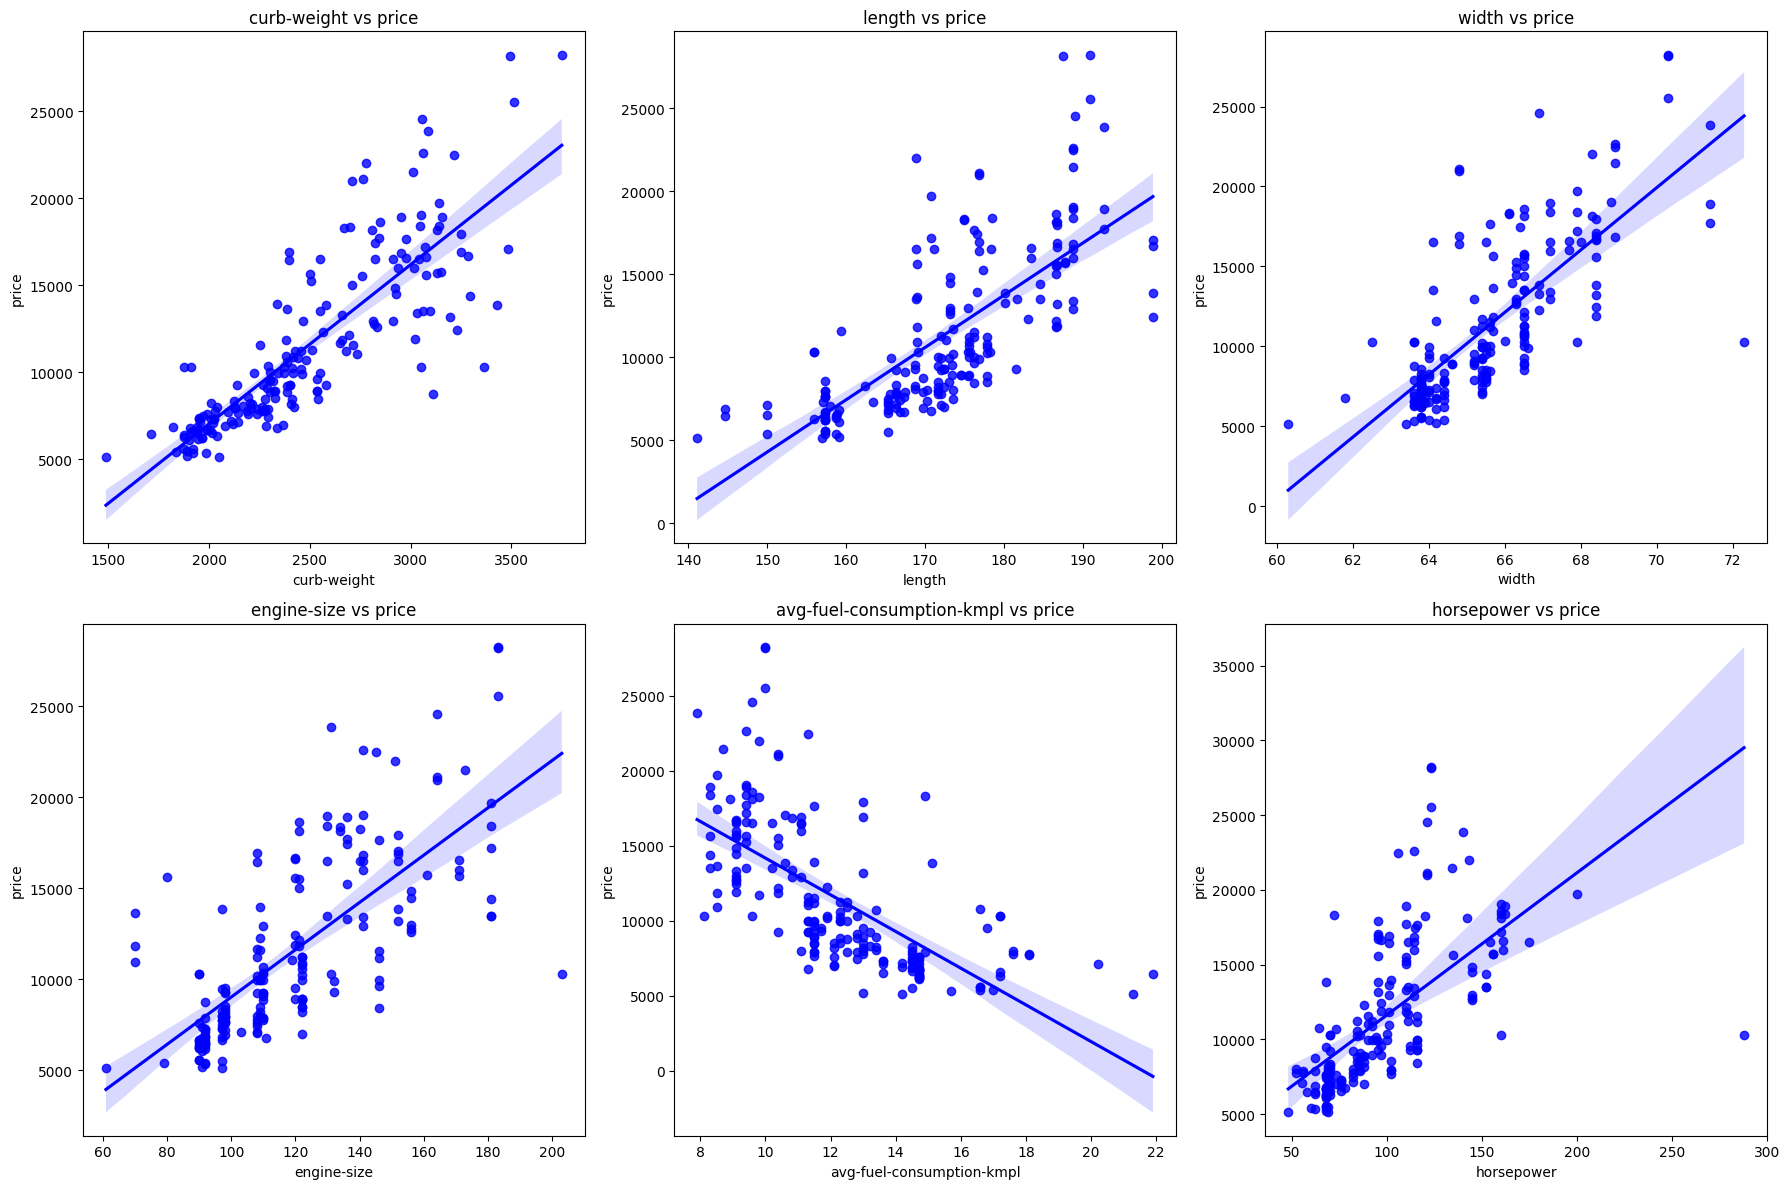

In [241]:
# Criando uma matriz de gráficos de regressão (scatter com linha de regressão)
num_cols = 3
num_rows = int(np.ceil(len(numeric_feature_corr_list[:-1]) / num_cols))  # Exclui 'price' como y

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

for i, feature in enumerate(numeric_feature_corr_list[:-1]):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.regplot(x=feature, y='price', data=df_corr, color='blue', ax=ax)
    ax.set_title(f'{feature} vs price')

# Esconde eixos vazios, se houver
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
fig.savefig('../reports/figures/eda_scatterplot_correlation')

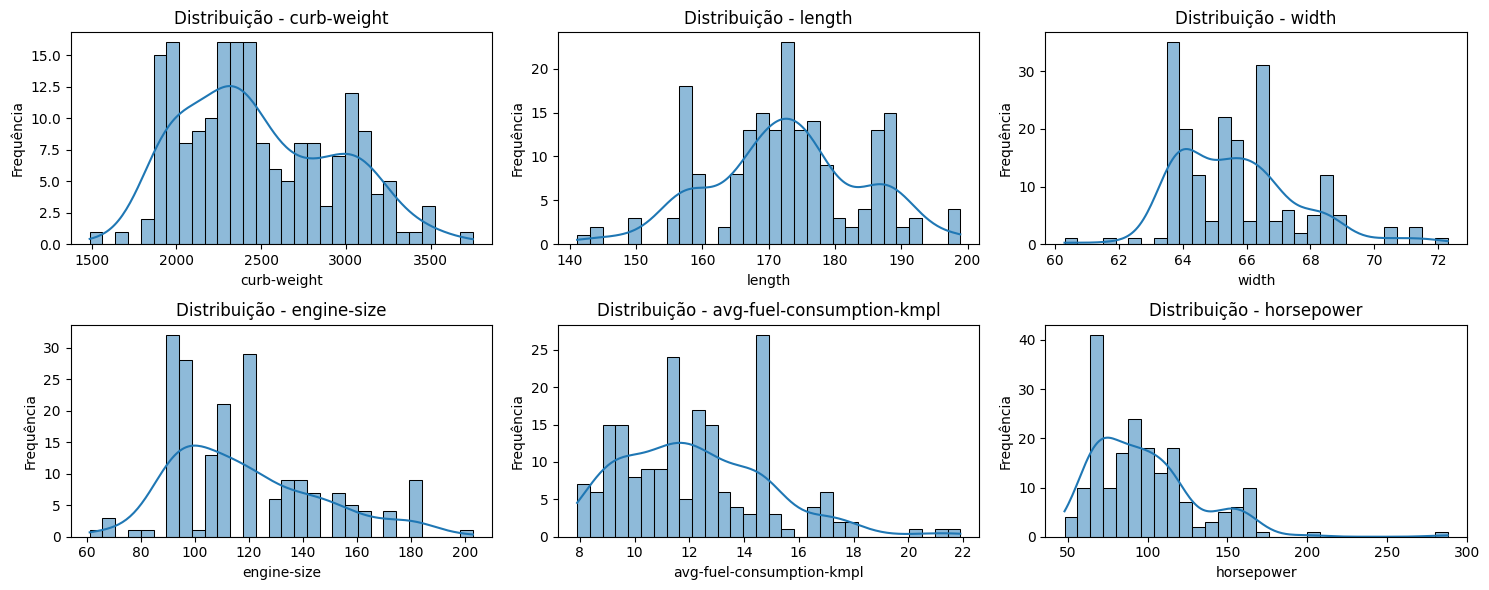

In [242]:
# Histograma para distribuição (em matriz de subplots)

n = len(numeric_feature_corr_list[:-1]) #exclui a última posição `price`
cols = 3  # número de colunas da matriz de gráficos
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*3))
axes = axes.flatten()

for i, col in enumerate(numeric_feature_corr_list[:-1]):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribuição - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Remove eixos extras se houver
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.savefig('../reports/figures/eda_hist_numerical')
plt.show()

#### 📌 INSIGHT REVISADO:

- Das 13 variáveis numéricas analisadas, 6 apresentaram coeficiente de correlação de Pearson com |r| ≥ 0.70, sendo classificadas como de ***correlação forte ou muito forte*** com a variável `price`.
- Todas as 6 variáveis dizem respeito a características técnicas do veículo, sendo:
  - **Chassi:** `curb-weight`, `length`, `width`
  - **Powertrain:** `engine-size`, `horsepower`, `avg-fuel-consumption-kmpl`
- A variável `avg-fuel-consumption-kmpl` apresentou **correlação negativa com o preço**, sugerindo que ***veículos mais caros tendem a ser menos econômicos*** (fazem menos km por litro), o que pode refletir em um perfil de mercado com interesse maior em carros mais potentes e maiores.
- Este padrão reforça que o mercado valoriza veículos com estrutura maior e motores mais robustos, ainda que isso implique menor economia de combustível.


#### Variáveis Categóricas


In [ ]:
# Seleciona as variáveis categóricas ´object´ em lista
categorical_features_list = df.select_dtypes(include=['object']).columns.to_list()

# Remove a última coluna derivada do preço `price-binned`
categorical_features_list.pop(-1)

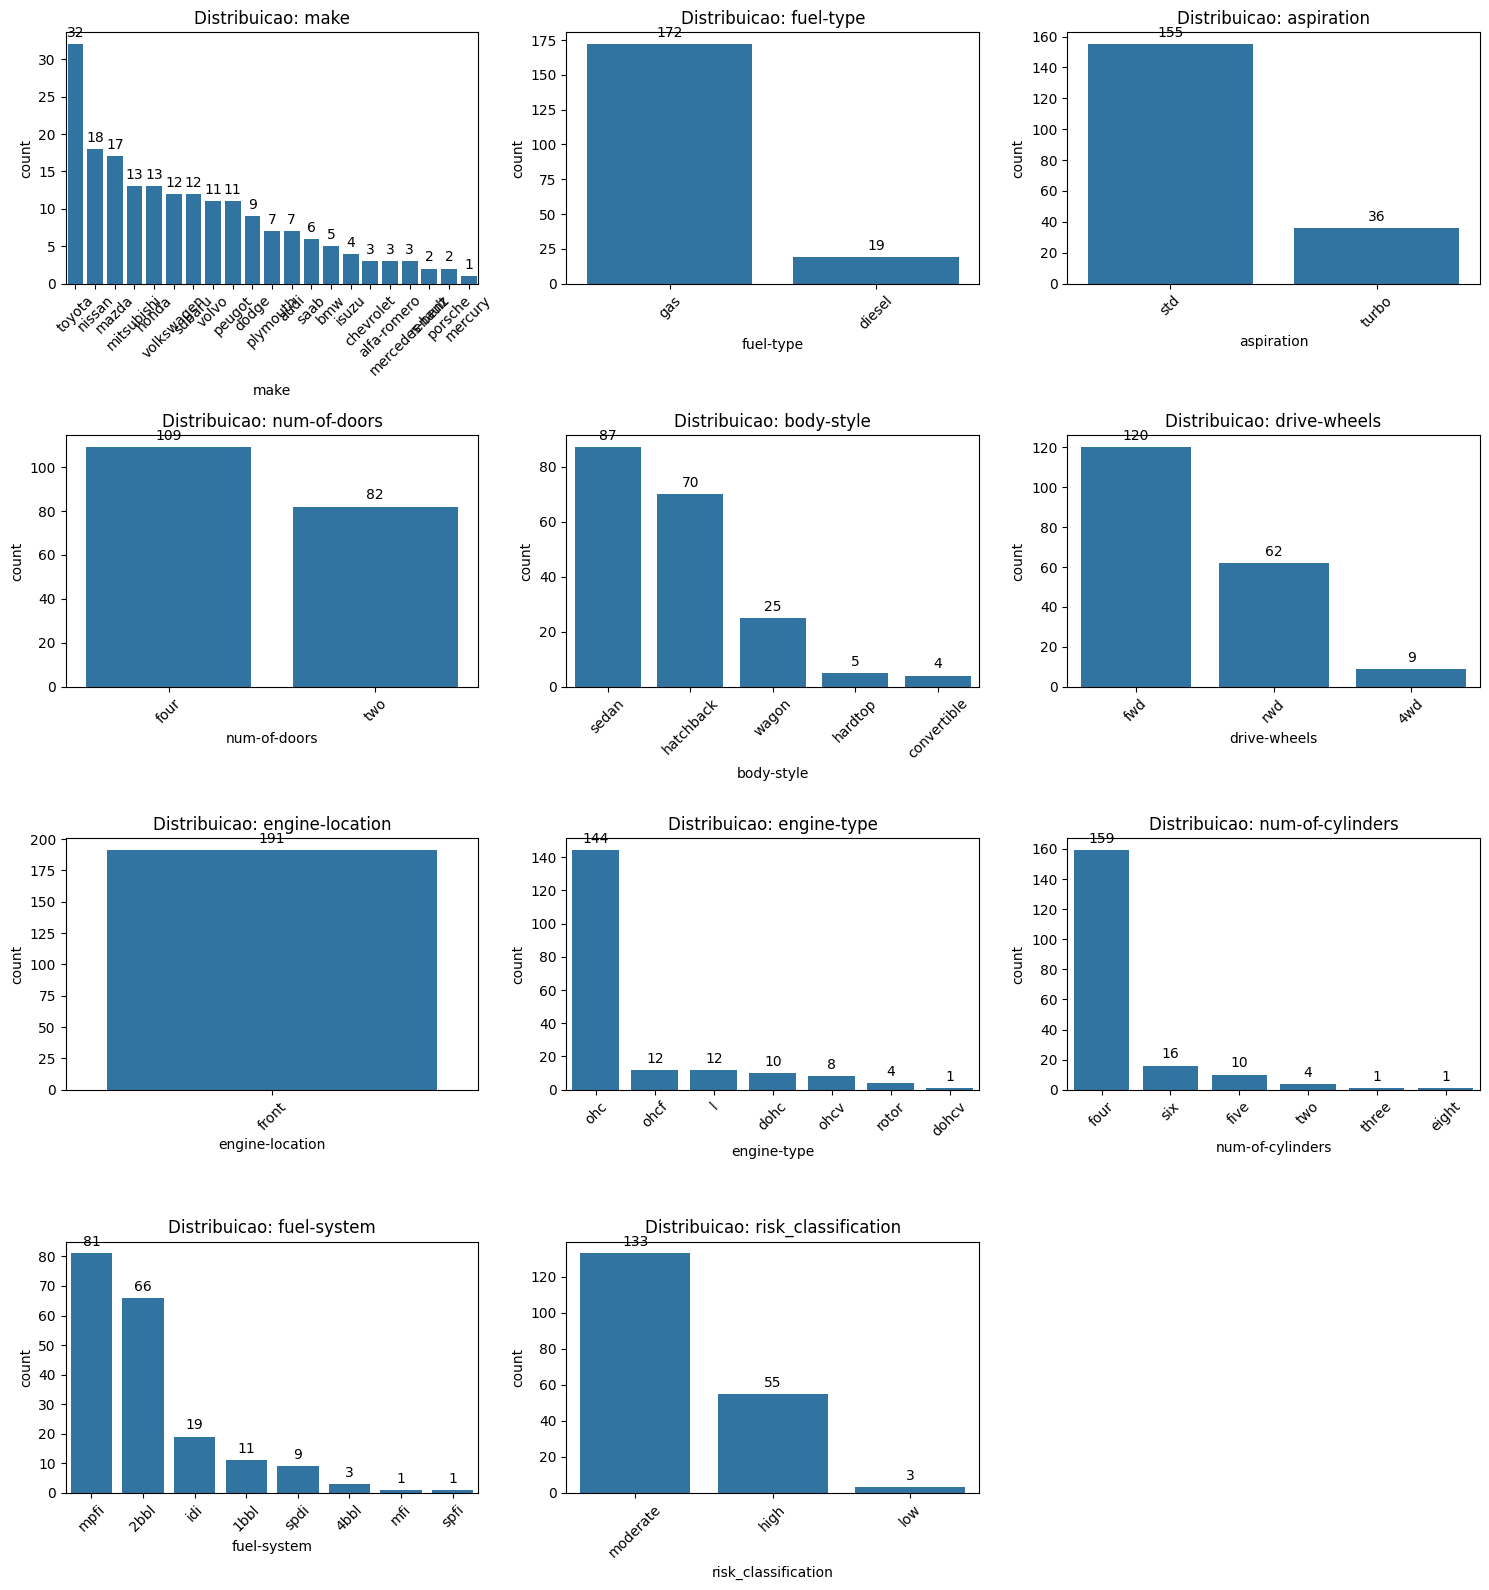

In [246]:
# Distribuição de frequência Absoluta

n = len(categorical_features_list)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(categorical_features_list):
    ax=axes[i]
    counts = df[col].value_counts()
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i] )
    axes[i].set_title(f'Distribuicao: {col}')
    axes[i].tick_params(axis='x', rotation=45)

        # Adiciona labels nas barras
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.savefig('../reports/figures/eda_hist_categorical')

In [252]:
# Distribuição de Frequência Normalizada por Fabricante
for col in categorical_features_list:
    print(df[col].value_counts(normalize=True)*100)

make
toyota           16.753927
nissan            9.424084
mazda             8.900524
mitsubishi        6.806283
honda             6.806283
volkswagen        6.282723
subaru            6.282723
volvo             5.759162
peugot            5.759162
dodge             4.712042
plymouth          3.664921
audi              3.664921
saab              3.141361
bmw               2.617801
isuzu             2.094241
chevrolet         1.570681
alfa-romero       1.570681
mercedes-benz     1.570681
renault           1.047120
porsche           1.047120
mercury           0.523560
Name: proportion, dtype: float64
fuel-type
gas       90.052356
diesel     9.947644
Name: proportion, dtype: float64
aspiration
std      81.151832
turbo    18.848168
Name: proportion, dtype: float64
num-of-doors
four    57.068063
two     42.931937
Name: proportion, dtype: float64
body-style
sedan          45.549738
hatchback      36.649215
wagon          13.089005
hardtop         2.617801
convertible     2.094241
Name: propor

In [251]:
# 4. Preço médio por categoria (tabela)
for col in categorical_features_list:
    mean_price = df.groupby(col)['price'].mean().sort_values(ascending=False).round(2)
    print(f'\nPreço médio por {col}:\n{mean_price}')


Preço médio por make:
make
mercedes-benz    27325.33
bmw              19999.00
volvo            18063.18
audi             16778.57
mercury          16503.00
porsche          16156.50
alfa-romero      15498.33
peugot           15489.09
saab             15223.33
mazda            10652.88
nissan           10415.67
volkswagen       10077.50
toyota            9885.81
isuzu             9605.75
renault           9595.00
mitsubishi        9239.77
subaru            8541.25
honda             8184.69
plymouth          7963.43
dodge             7875.44
chevrolet         6007.00
Name: price, dtype: float64

Preço médio por fuel-type:
fuel-type
diesel    15008.58
gas       11087.85
Name: price, dtype: float64

Preço médio por aspiration:
aspiration
turbo    15663.00
std      10505.85
Name: price, dtype: float64

Preço médio por num-of-doors:
num-of-doors
four    12113.62
two     10632.79
Name: price, dtype: float64

Preço médio por body-style:
body-style
convertible    14814.75
hardtop        13142

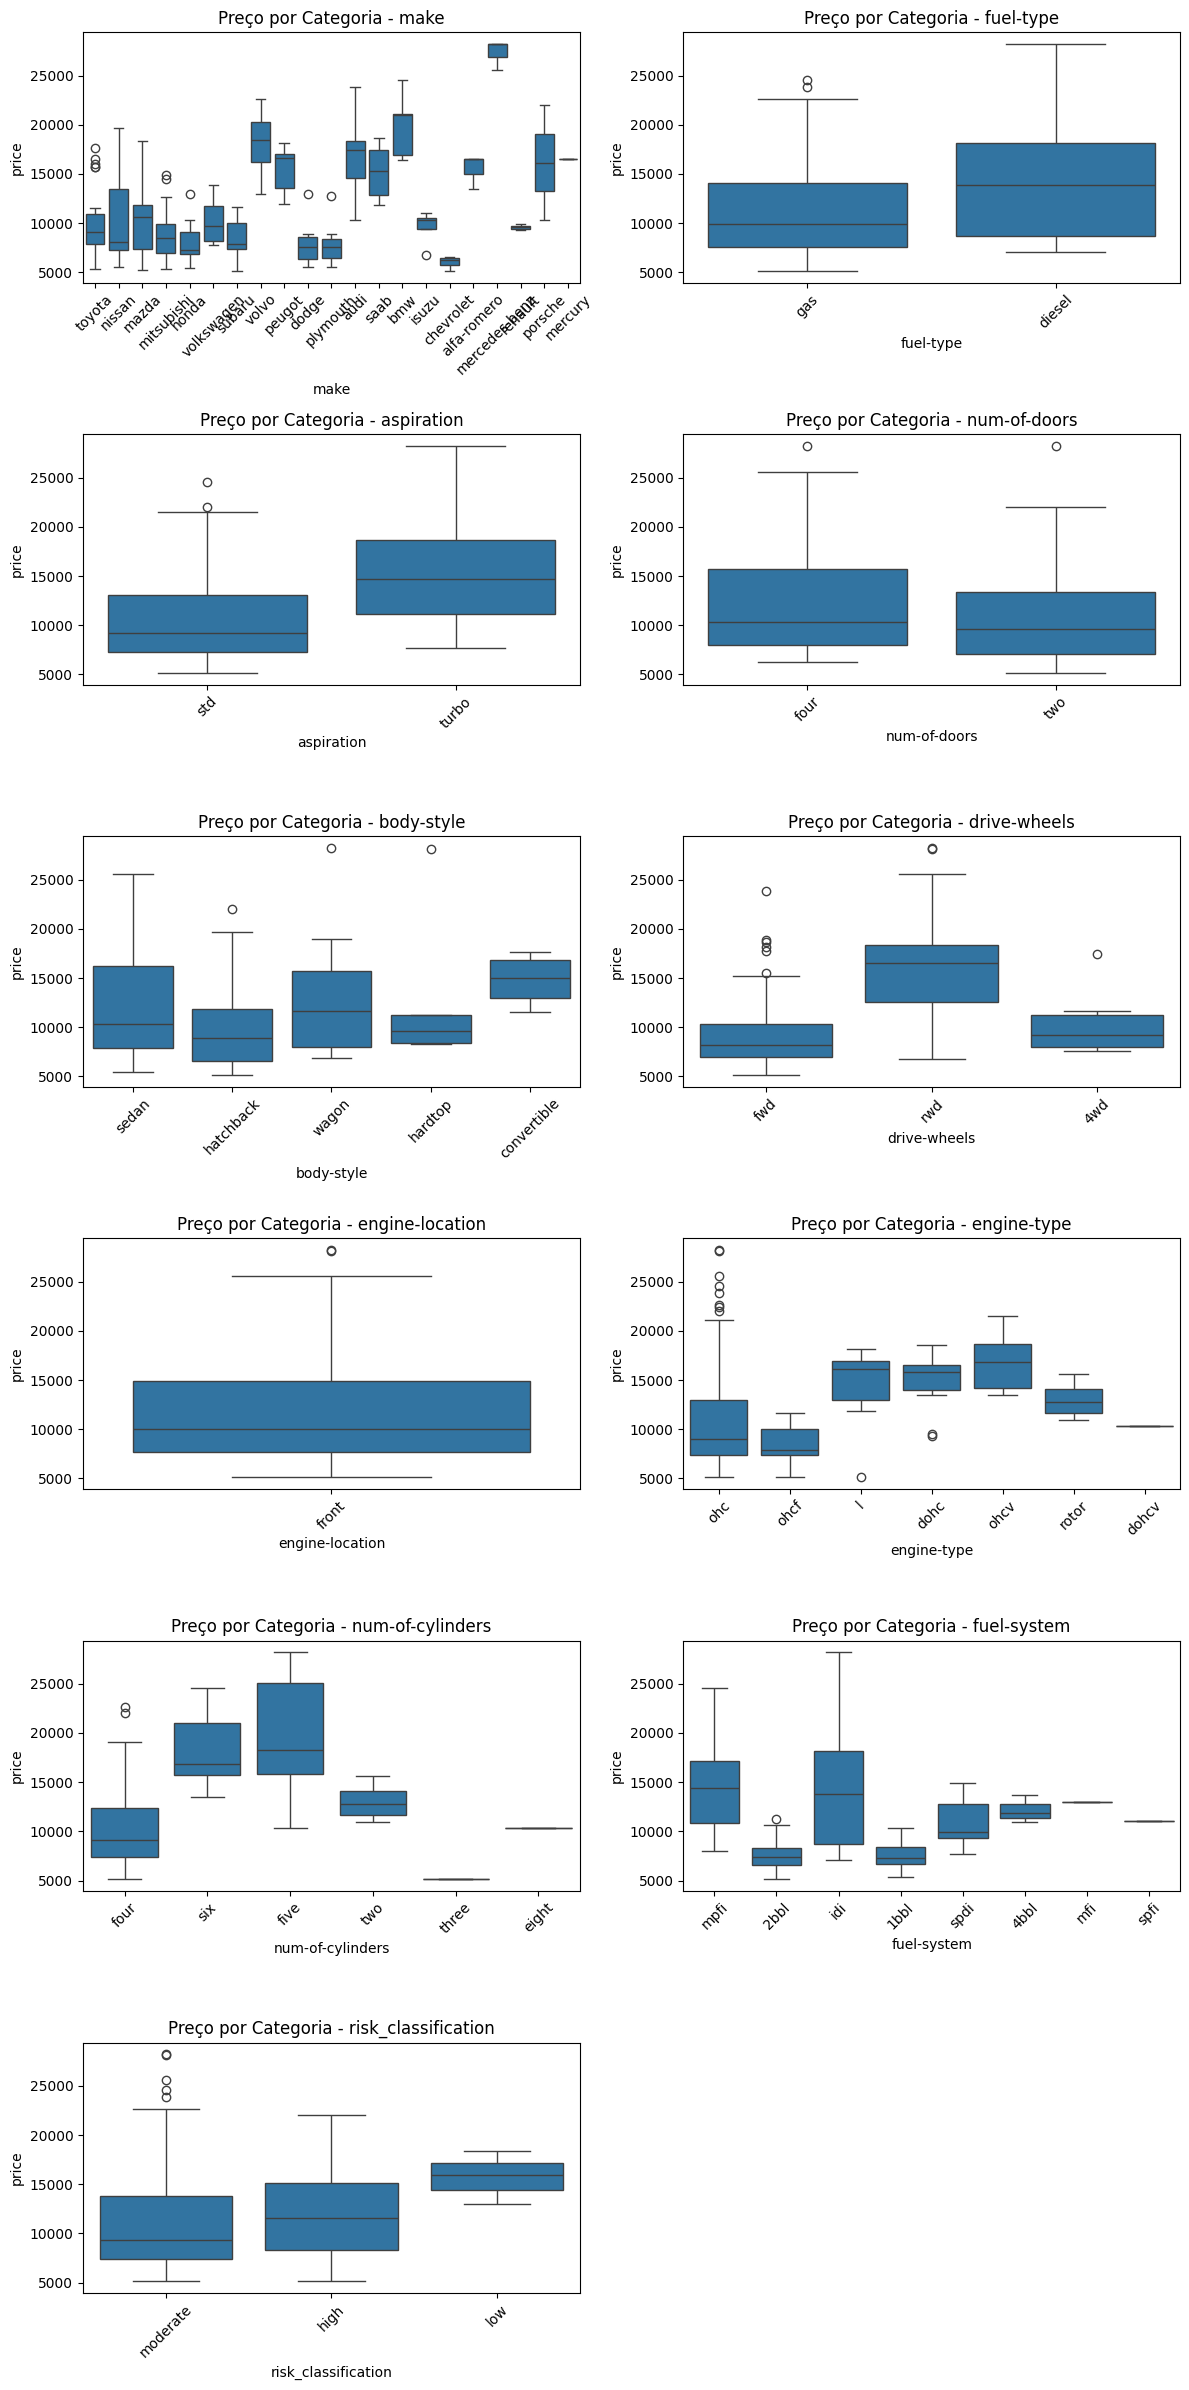

In [244]:
# Distribuição dos Preços por Categoria - Boxplot
if 'price' in df.columns:
    n = len(categorical_features_list)
    cols = 2
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
    axes = axes.flatten()

    for i, col in enumerate(categorical_features_list):
        sns.boxplot(data=df, x=col, y='price', order=df[col].value_counts().index, ax=axes[i])
        axes[i].set_title(f'Preço por Categoria - {col}')
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    fig.savefig('../reports/figures/eda_boxplot_categorical')
